ejemplo de clasificacición usando l1 y l2

In [1]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt

#extraccion de datos
iris= datasets.load_iris()

#x_data= iris.data
#y_labels= iris.target
hidden_nodos=64
x_data=np.array([x[3] for x in iris.data])
y_label=np.array([y[0] for y in iris.data])
# Creación de training ans testing

rand_training =np.random.choice(len(y_label), replace=False,size=round(len(y_label)*0.8))
rand_testing=np.array(list(set(range(len(y_label)))-set(rand_training)))
# Creación de training and testing

training_x=x_data[rand_training]
training_y=y_label[rand_training]

testing_x=x_data[rand_training]
testing_y=y_label[rand_testing]

# Creación de placeholder

x_input=tf.placeholder(tf.float32,shape=[None, 1])
y_target=tf.placeholder(tf.float32,shape=[None,1])

#Creación Variables

weight=tf.Variable(tf.random_normal(mean=1, stddev=0.01,shape=[1,1]))
bias=tf.Variable(tf.random_normal(mean=1,stddev=0.01,shape=[1]))

# Creación de regression

y_output=tf.add(tf.matmul(x_input,weight),bias)

# creación de regularizaciones
l1_regularizer = tf.contrib.layers.l1_regularizer(scale=0.05, scope=None)

weights = tf.trainable_variables() # all vars of your graph
regularization_penalty = tf.contrib.layers.apply_regularization(l1_regularizer, weights)

# Creación de costo 

loss=tf.add(tf.reduce_mean(tf.square(y_target-y_output)),regularization_penalty)

optimizador=tf.train.AdamOptimizer(0.05).minimize(loss)


##Creación de session

init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)
batch_size=20

loss_training=[]
loss_testing=[]

for i in range(300):
    #creamos batch para training
    rand_int_training=np.random.choice(len(training_y),batch_size)
    rand_x_training=np.transpose([training_x[rand_int_training]])
    rand_y_training=np.transpose([training_y[rand_int_training]])
    #Creamos bact para testing
    
    rand_int_testing=np.random.choice(len(testing_y),batch_size)
    rand_x_testing=np.transpose([testing_x[rand_int_testing]])
    rand_y_testing=np.transpose([testing_y[rand_int_testing]])
    
    _, l_training=sess.run([optimizador,loss],feed_dict={x_input:rand_x_training,y_target:rand_y_training})
    l_testing=sess.run(loss, feed_dict={x_input:rand_x_testing,y_target:rand_y_testing})
    loss_training.append(l_training)
    loss_testing.append(l_testing)
    print('error de training en iteraccion', i, ' es ', l_training)
    print('error de testing en iteraccion', i, ' es ', l_testing)
    



sess.close()





error de training en iteraccion 0  es  12.4521
error de testing en iteraccion 0  es  13.3161
error de training en iteraccion 1  es  12.3175
error de testing en iteraccion 1  es  14.3877
error de training en iteraccion 2  es  10.6793
error de testing en iteraccion 2  es  19.4309
error de training en iteraccion 3  es  11.4318
error de testing en iteraccion 3  es  10.8745
error de training en iteraccion 4  es  11.3244
error de testing en iteraccion 4  es  13.1318
error de training en iteraccion 5  es  10.1832
error de testing en iteraccion 5  es  9.26792
error de training en iteraccion 6  es  9.48703
error de testing en iteraccion 6  es  10.9441
error de training en iteraccion 7  es  9.18133
error de testing en iteraccion 7  es  10.7297
error de training en iteraccion 8  es  8.96403
error de testing en iteraccion 8  es  8.41135
error de training en iteraccion 9  es  8.5148
error de testing en iteraccion 9  es  9.04184
error de training en iteraccion 10  es  7.37565
error de testing en ite

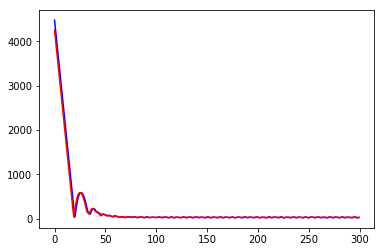

In [89]:
#graficamos
plt.plot(loss_training,'blue')
plt.plot(loss_testing,'red')
plt.show()